The aim of this project is to analyse  uber travels in a fiction city. we want to know about our customers to serve them better.
the dataset was gotten from kaggle.

In [1]:
#importing important modules
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
df=pd.read_csv('uber.csv')
df.head()

,Request id,Pickup,Driverid,Status,Requesttimestamp,Droptimestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
#shape of the data
df.shape

(6745, 6)

In [4]:
df.describe()

,Request id,Driverid
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request id        6745 non-null   int64  
 1   Pickup            6745 non-null   object 
 2   Driverid          4095 non-null   float64
 3   Status            6745 non-null   object 
 4   Requesttimestamp  6745 non-null   object 
 5   Droptimestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
# placing the numircal and catergorical variable to be able to plot them to have a glance of the distribution of the dataset
num=df[['Request id','Driverid']]
cat=df[['Pickup','Status','Requesttimestamp','Droptimestamp']]

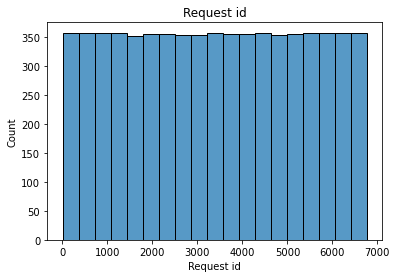

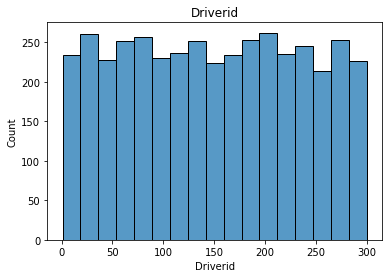

In [7]:
#plotting the numerical value
for i in num:
    sns.histplot(df[i])
    plt.title(i)
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


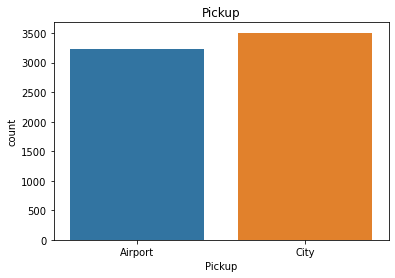

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


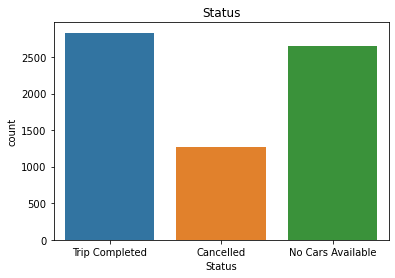

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


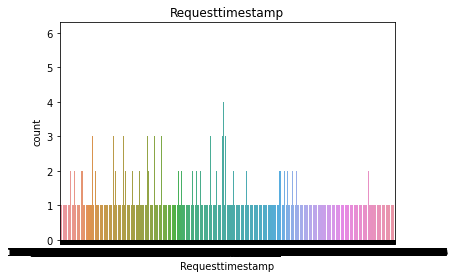

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


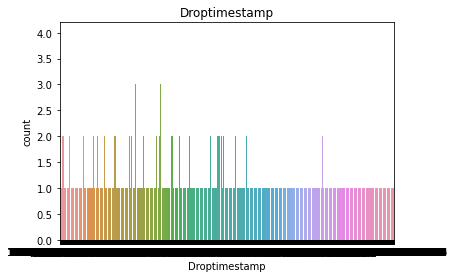

In [8]:
#plotting the categorical value
for i in cat:
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

In [9]:
#checking for null data
df.isnull().sum()

Request id             0
Pickup                 0
Driverid            2650
Status                 0
Requesttimestamp       0
Droptimestamp       3914
dtype: int64

In [10]:
#changing to date data type
df['Requesttimestamp']=pd.to_datetime(df.Requesttimestamp)
df['Droptimestamp']=pd.to_datetime(df.Droptimestamp)
df.head()

,Request id,Pickup,Driverid,Status,Requesttimestamp,Droptimestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [11]:
#creating a new time from old column
df['Requesttime']=df.Requesttimestamp.dt.hour
df['Droptime']=df.Droptimestamp.dt.hour
df.head()

,Request id,Pickup,Driverid,Status,Requesttimestamp,Droptimestamp,Requesttime,Droptime
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,18.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0


In [12]:
#droping columns
df=df.drop(['Requesttimestamp','Droptimestamp'],axis='columns')
df.head()

,Request id,Pickup,Driverid,Status,Requesttime,Droptime
0,619,Airport,1.0,Trip Completed,11,13.0
1,867,Airport,1.0,Trip Completed,17,18.0
2,1807,City,1.0,Trip Completed,9,9.0
3,2532,Airport,1.0,Trip Completed,21,22.0
4,3112,City,1.0,Trip Completed,8,9.0


In [13]:
#creating a new column to contain the time of the day
def condition (x):
    if x>4 and x<=12:
        return 'Morning'
    elif x>12 and x<=14:
        return 'Afternoon'
    elif x>14 and x<=19:
        return 'Evening'
    else:
        return 'Night'
df['Time']=df.Requesttime.apply(condition)
df.head()

,Request id,Pickup,Driverid,Status,Requesttime,Droptime,Time
0,619,Airport,1.0,Trip Completed,11,13.0,Morning
1,867,Airport,1.0,Trip Completed,17,18.0,Evening
2,1807,City,1.0,Trip Completed,9,9.0,Morning
3,2532,Airport,1.0,Trip Completed,21,22.0,Night
4,3112,City,1.0,Trip Completed,8,9.0,Morning


In [14]:
#dropping columns
df=df.drop(['Requesttime','Droptime','Request id'],axis='columns')
df.head()

,Pickup,Driverid,Status,Time
0,Airport,1.0,Trip Completed,Morning
1,Airport,1.0,Trip Completed,Evening
2,City,1.0,Trip Completed,Morning
3,Airport,1.0,Trip Completed,Night
4,City,1.0,Trip Completed,Morning


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pickup', ylabel='count'>

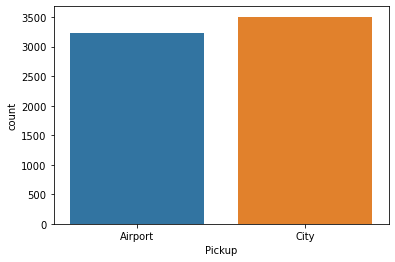

In [15]:
#plotting graph
sns.countplot(df.Pickup)

In [16]:
#getting status satistics
df.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='count'>

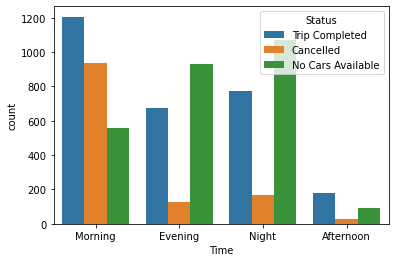

In [17]:
#plotting graph
sns.countplot(df.Time,hue=df.Status)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pickup', ylabel='count'>

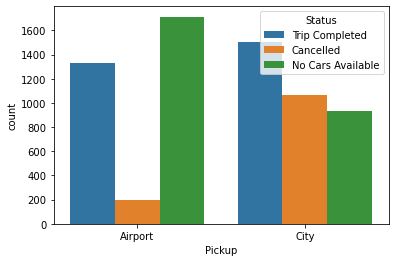

In [18]:
#plotting graph
sns.countplot(df.Pickup,hue=df.Status)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='count'>

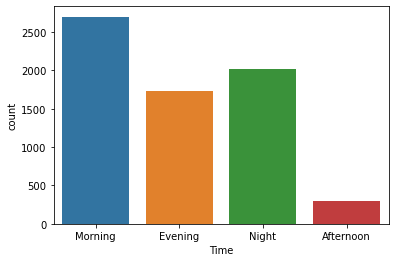

In [19]:
#plotting graph
sns.countplot(df.Time)

# Observations


1.there are more pickup in the city than the airport

2.there are no cars available than cancelled trips

3.At night and eveing cars are mostly not available

4.there are less request at noon than the rest of the day

5.there are less cars at the airport